In [7]:
# %matplotlib inline
import matplotlib.pyplot as plt

import torch
# import torchvision
# import torch.nn as nn
from torch.utils.data import DataLoader
# from torchvision.io import read_image
import torchvision.transforms as tvt
# import torch.nn.functional as F

import numpy as np
import seaborn as sns
import time
import pickle
# import os, glob

# User imports
from dataLoader import dataLoader
from model import mynet

In [8]:
def run_code_for_validation(net, valDataLoader, classes):
    net = net.to(device)
    criterion = torch.nn.CrossEntropyLoss()
    confusion = np.zeros((len(classes),len(classes)))
    correct = 0
    total = 0
    for i,data in enumerate(valDataLoader):
        (inputs, labels) = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        # print(labels)
        outputs = net(inputs)
        # print(outputs)
        prediction = [torch.argmax(x) for x in outputs]
        
        #  torch.argmax(outputs, dim=1)
        
        for j, gt in enumerate(labels):
            if gt == prediction[j]:
                correct += 1
            confusion[gt][prediction[j]] +=1
    return confusion, correct

['airplane' 'boat' 'cat' 'dog' 'elephant' 'giraffe' 'horse' 'refrigerator'
 'train' 'truck']
['airplane' 'boat' 'cat' 'dog' 'elephant' 'giraffe' 'horse' 'refrigerator'
 'train' 'truck']


<AxesSubplot:>

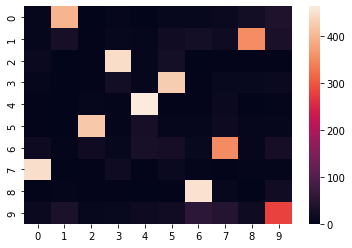

In [9]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")

batch=256
dataPath = "../hw04_coco_data/Val"
transform = tvt.Compose([tvt.ToTensor(), tvt.Normalize((0.5,0.5, 0.5), (0.5, 0.5, 0.5))])            
           
dt = dataLoader(dataPath,transform)
valDataLoader = DataLoader(dataset = dt, batch_size = batch, shuffle = False, num_workers = 16)
print(dt.classes)
net = torch.load("../saves/net1.pth")
net.eval()
confusion1,correct1 = run_code_for_validation(net, valDataLoader, dt.classes)
sns.heatmap(confusion1)
# net = torch.load("../saves/net2.pth")
# confusion2 = run_code_for_validation(net, valDataLoader, dt.classes)
# net = torch.load("../saves/net3.pth")
# confusion3 = run_code_for_validation(net, valDataLoader, dt.classes)
